リメイク版動画＃５ 

インポート文

In [3]:
import pandas as pd
import preprocessing
from pathlib import Path

DATA_DIR = Path("..","data")
COMMON_DATA_DIR = Path("..","..","common","src","data")
RAWDF_DIR = COMMON_DATA_DIR/"rawdf"

In [4]:
df = pd.read_csv(RAWDF_DIR/"results.csv",sep="\t")

In [5]:
df.iloc[:,10:20]

,単勝,人気,馬体重,調教師,horse_id,jockey_id,trainer_id,owner_id,ﾀｲﾑ指数,通過
0,4.2,3.0,466(-12),[東] 田中博康,2021105821,5386,1162,226800,**,2-2
1,8.4,5.0,496(+6),[東] 高橋裕,2021106805,1091,412,546800,**,5-4
2,15.3,6.0,446(-6),[東] 村田一誠,2021102685,1122,1190,897009,**,5-4
3,3.9,2.0,420(+2),[東] 深山雅史,2021100328,1150,1174,368803,**,4-4
4,50.9,9.0,458(+4),[東] 小手川準,2021102752,733,1171,866800,**,8-7
...,...,...,...,...,...,...,...,...,...,...
89131,172.3,13.0,512(+4),[西] 加用正,2017104873,1154,425,758005,**,15-15
89132,94.7,12.0,498(+10),[西] 寺島良,2019100653,1138,1158,950006,**,9-11
89133,75.0,10.0,508(+2),[西] 杉山佳明,2017106240,1018,1178,258033,**,5-6
89134,368.3,15.0,472(-4),[東] 石毛善彦,2018103205,1112,428,629800,**,5-4


In [6]:
df["着順"]

0         1
1         2
2         3
3         4
4         5
         ..
89131    12
89132    13
89133    14
89134    15
89135    16
Name: 着順, Length: 89136, dtype: object

In [7]:
df["rank"] = pd.to_numeric(df["着順"], errors="coerce")
df["rank"].value_counts(dropna=False)

rank
1.0     6515
3.0     6513
2.0     6506
4.0     6506
5.0     6502
6.0     6485
7.0     6448
8.0     6305
9.0     6096
10.0    5779
11.0    5367
12.0    4862
13.0    4320
14.0    3800
15.0    3125
16.0    2317
NaN      773
17.0     538
18.0     379
Name: count, dtype: int64

In [8]:
df.dropna(subset=["rank"], inplace=True)

In [9]:
df["rank"].value_counts(dropna=False)

rank
1.0     6515
3.0     6513
2.0     6506
4.0     6506
5.0     6502
6.0     6485
7.0     6448
8.0     6305
9.0     6096
10.0    5779
11.0    5367
12.0    4862
13.0    4320
14.0    3800
15.0    3125
16.0    2317
17.0     538
18.0     379
Name: count, dtype: int64

In [10]:
df["馬番"].astype(int)

0        14
1         7
2        16
3         4
4        12
         ..
89131    11
89132    15
89133     7
89134    16
89135    14
Name: 馬番, Length: 88363, dtype: int64

In [11]:
df["性齢"].str[0].value_counts()

性齢
牡    47051
牝    37115
セ     4197
Name: count, dtype: int64

ラベルエンコーディング：カテゴリ変数を整数にマッピングするデータ加工手法

In [12]:
sex_mapping = {"牡": 0, "牝": 1, "セ": 2}

In [13]:
df["性齢"].str[0].map(sex_mapping).value_counts()

性齢
0    47051
1    37115
2     4197
Name: count, dtype: int64

In [14]:
df["性齢"].str[1:].astype(int)

0        3
1        3
2        3
3        3
4        3
        ..
89131    6
89132    4
89133    6
89134    5
89135    6
Name: 性齢, Length: 88363, dtype: int64

In [15]:
df["単勝"].astype(float)

0          4.2
1          8.4
2         15.3
3          3.9
4         50.9
         ...  
89131    172.3
89132     94.7
89133     75.0
89134    368.3
89135    347.8
Name: 単勝, Length: 88363, dtype: float64

In [16]:
df["人気"].astype(int)

0         3
1         5
2         6
3         2
4         9
         ..
89131    13
89132    12
89133    10
89134    15
89135    14
Name: 人気, Length: 88363, dtype: int64

In [17]:
df["馬体重"]

0        466(-12)
1         496(+6)
2         446(-6)
3         420(+2)
4         458(+4)
           ...   
89131     512(+4)
89132    498(+10)
89133     508(+2)
89134     472(-4)
89135    490(+14)
Name: 馬体重, Length: 88363, dtype: object

In [18]:
df["weight"] = df["馬体重"].str.extract(r"(\d+)").astype(int)
df["weight"]

0        466
1        496
2        446
3        420
4        458
        ... 
89131    512
89132    498
89133    508
89134    472
89135    490
Name: weight, Length: 88363, dtype: int64

In [19]:
df["weight_diff"] = df["馬体重"].str.extract(r"\((.+)\)").astype(int)

In [20]:
df["weight_diff"]

0       -12
1         6
2        -6
3         2
4         4
         ..
89131     4
89132    10
89133     2
89134    -4
89135    14
Name: weight_diff, Length: 88363, dtype: int64

In [21]:
df = pd.read_csv(RAWDF_DIR/"horse_results.csv",sep="\t")

リメイク版動画＃6 特徴量作成

In [22]:
from pathlib import Path
import pandas as pd

DATA_DIR = Path("..","data")

In [23]:
results = pd.read_csv(DATA_DIR/"01_preprocessed"/"results.csv",sep="\t")
horse_results = pd.read_csv(DATA_DIR/"01_preprocessed"/"horse_results.csv",sep="\t")


In [24]:
results

,race_id,horse_id,jockey_id,trainer_id,rank,sex,age,weight,weight_diff,tansho_odds,popularity,impost,wakuban,umaban
0,202301010101,2021100648,1095,1128,5,1,2,434,-10,23.9,5,55.0,1,1
1,202301010101,2021100159,1157,1186,6,0,2,454,-6,61.8,7,55.0,2,2
2,202301010101,2021100265,1197,1192,7,1,2,404,-2,18.8,4,53.0,3,3
3,202301010101,2021105553,5339,1160,4,1,2,450,2,16.6,3,55.0,4,4
4,202301010101,2021101429,1170,1026,1,0,2,452,-4,1.2,1,55.0,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88358,202410030812,2020101594,1187,1135,3,0,4,446,0,35.0,10,56.0,6,11
88359,202410030812,2021104131,1018,1003,5,0,3,474,-2,4.2,2,55.0,7,12
88360,202410030812,2020103212,5212,1061,7,0,4,522,2,5.4,3,58.0,7,13
88361,202410030812,2020103550,1154,1121,10,0,4,484,6,28.1,8,58.0,8,14


In [25]:
horse_results

,horse_id,date,rank,prize,rank_diff,weather,race_type,course_len,ground_state,race_class,n_horses
0,2016100158,2024-07-27,12,0.0,3.6,1.0,3,3250,0.0,NaN,13.0
1,2016100158,2024-06-22,10,0.0,4.1,0.0,3,3110,1.0,NaN,14.0
2,2016100158,2024-06-01,9,0.0,1.6,0.0,0,1800,1.0,5.0,10.0
3,2016100158,2024-04-13,7,0.0,4.3,0.0,3,4250,0.0,NaN,12.0
4,2016100158,2023-12-23,6,0.0,4.5,0.0,3,4100,0.0,NaN,12.0
...,...,...,...,...,...,...,...,...,...,...,...
221487,2021106341,2024-05-31,5,5.4,2.5,1.0,0,1500,3.0,NaN,12.0
221488,2021106341,2024-05-06,10,0.0,3.0,1.0,0,1500,0.0,NaN,12.0
221489,2021106341,2024-04-25,7,0.0,1.3,0.0,0,1500,2.0,NaN,12.0
221490,2021106341,2024-04-12,12,0.0,4.0,0.0,0,1500,0.0,NaN,12.0


In [26]:
results.to_csv(DATA_DIR/"01_preprocessed"/"results.csv", sep="\t")

In [27]:
race_id = "202301010101"	

In [28]:
results.index=results["race_id"]

In [29]:
horse_results.index.name = "horse_id"

In [30]:
horse_results = pd.read_csv(DATA_DIR/"01_preprocessed"/"horse_results.csv",sep="\t")

In [31]:
results

,race_id,horse_id,jockey_id,trainer_id,rank,sex,age,weight,weight_diff,tansho_odds,popularity,impost,wakuban,umaban
race_id,,,,,,,,,,,,,,
202301010101,202301010101,2021100648,1095,1128,5,1,2,434,-10,23.9,5,55.0,1,1
202301010101,202301010101,2021100159,1157,1186,6,0,2,454,-6,61.8,7,55.0,2,2
202301010101,202301010101,2021100265,1197,1192,7,1,2,404,-2,18.8,4,53.0,3,3
202301010101,202301010101,2021105553,5339,1160,4,1,2,450,2,16.6,3,55.0,4,4
202301010101,202301010101,2021101429,1170,1026,1,0,2,452,-4,1.2,1,55.0,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202410030812,202410030812,2020101594,1187,1135,3,0,4,446,0,35.0,10,56.0,6,11
202410030812,202410030812,2021104131,1018,1003,5,0,3,474,-2,4.2,2,55.0,7,12
202410030812,202410030812,2020103212,5212,1061,7,0,4,522,2,5.4,3,58.0,7,13


In [32]:
#horse_results.drop(horse_results.columns[0],axis=1)

In [33]:
results = results.drop(results.columns[[0]],axis=1)


In [34]:
results

,horse_id,jockey_id,trainer_id,rank,sex,age,weight,weight_diff,tansho_odds,popularity,impost,wakuban,umaban
race_id,,,,,,,,,,,,,
202301010101,2021100648,1095,1128,5,1,2,434,-10,23.9,5,55.0,1,1
202301010101,2021100159,1157,1186,6,0,2,454,-6,61.8,7,55.0,2,2
202301010101,2021100265,1197,1192,7,1,2,404,-2,18.8,4,53.0,3,3
202301010101,2021105553,5339,1160,4,1,2,450,2,16.6,3,55.0,4,4
202301010101,2021101429,1170,1026,1,0,2,452,-4,1.2,1,55.0,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
202410030812,2020101594,1187,1135,3,0,4,446,0,35.0,10,56.0,6,11
202410030812,2021104131,1018,1003,5,0,3,474,-2,4.2,2,55.0,7,12
202410030812,2020103212,5212,1061,7,0,4,522,2,5.4,3,58.0,7,13


In [35]:
df = preprocessing.process_race_info()

In [36]:
df["weather"].unique()

array([ 0.,  1.,  3.,  2., nan])

In [37]:
df["ground_state"].unique()

array([0, 3, 1, 2])

In [56]:
df["tmp"] = df["info1"].map(lambda x: eval(x)[0])

KeyError: 'info1'

リメイク版動画＃７　LightGBMを使って単勝馬券の予測をしてみる

In [39]:
INPUT_DIR = Path("..","data","02_features")
features = pd.read_csv(INPUT_DIR / "features.csv", sep = "\t")

In [40]:
features.columns

Index(['race_id', 'horse_id', 'date', 'jockey_id', 'trainer_id', 'rank', 'sex',
       'age', 'weight', 'weight_diff', 'tansho_odds', 'popularity', 'impost',
       'wakuban', 'umaban', 'race_type', 'around', 'course_len', 'weather',
       'ground_state', 'race_class', 'place', 'rank_1race', 'prize_1race',
       'rank_3races', 'prize_3races', 'rank_5races', 'prize_5races',
       'rank_10races', 'prize_10races', 'rank_1000races', 'prize_1000races'],
      dtype='object')

In [41]:
feature_cols = [
    'horse_id', 
    'jockey_id', 
    'trainer_id', 
    'sex',
    'age', 
    'weight', 
    'weight_diff', 
    'tansho_odds', 
    'popularity', 
    'impost',
    'wakuban', 
    'umaban', 
    'race_type', 
    'around', 
    'course_len', 
    'weather',
    'ground_state', 
    'race_class',
    'place',
    'rank_1race',
    'prize_1race',
    'rank_3races',
    'prize_3races',
    'rank_5races',
    'prize_5races',
    'rank_10races',
    'prize_10races',
    'rank_1000races',
    'prize_1000races'
]

In [42]:
#説明変数
X = features[feature_cols]

In [43]:
#目的変数
y = (features["rank"] == 1).astype(int)

In [44]:
features["target"] = (features["rank"] == 1).astype(int)

## ホールドアウト法
データを学習データと検証データにわける

In [48]:
train_df = features.query("date < '2023-10-01'")
test_df = features.query("date >= '2023-10-01'")

In [49]:
len(train_df), len(test_df)

(35524, 52839)

In [ ]:
import lightgbm as lgb

#データセットの作成
lgb_train = lgb.Dataset(
    train_df[feature_cols], train_df["target"]
)

lgb_test = lgb.Dataset(
    test_df[feature_cols], test_df["target"]
)

#パラメータの設定
params = {
    "objective": "binary", # 二値分類
    "metric": "binary_logloss", # 予測誤差
    "random_state":100 # 実行ごとに同じ結果を得るための設定
}

#学習の実行
model = lgb.train(
    params = params,
    train_set = lgb_train,
    valid_sets = [lgb_train, lgb_test],
    callbacks = [lgb.log_evaluation()]
)


ModuleNotFoundError: No module named 'lightgbm'

In [51]:
#学習の実行
model = lgb.train(
    params = params,
    train_set = lgb_train,
    valid_sets = [lgb_train, lgb_test],
    callbacks = [lgb.log_evaluation()]
)

NameError: name 'lgb' is not defined

In [ ]:
import graphviz
import matplotlib.pyplot as plt

# オフライン評価
的中率・回収率を見てみる

In [54]:
#テストデータに対して予測をしてみる
model.predict(test_df[feature_cols])

NameError: name 'model' is not defined

In [14]:
evaluation_df =test_df[
    [
        "race_id",
        "horse_id",
        "target",
        "rank",
        "tansho_odds",
        "popularity"
    ]
].copy()

In [16]:
evaluation_df

,race_id,horse_id,target,rank,tansho_odds,popularity
6254,202303030101,2021100761,0,10,2.1,1
6255,202303030101,2021106736,0,14,398.2,15
6256,202303030101,2021107376,0,15,177.5,12
6257,202303030101,2021109129,0,7,94.7,7
6258,202303030101,2021103986,0,12,173.0,11
...,...,...,...,...,...,...
43460,202309050912,2019103898,0,2,5.9,3
43461,202309050912,2019106102,0,8,11.9,6
43462,202309050912,2017102603,0,16,347.8,14
43463,202309050912,2019100653,0,13,94.7,12


In [17]:
evaluation_df["pred"] = model.predict(test_df[feature_cols])

In [18]:
evaluation_df

,race_id,horse_id,target,rank,tansho_odds,popularity,pred
6254,202303030101,2021100761,0,10,2.1,1,0.360813
6255,202303030101,2021106736,0,14,398.2,15,0.003836
6256,202303030101,2021107376,0,15,177.5,12,0.001615
6257,202303030101,2021109129,0,7,94.7,7,0.005445
6258,202303030101,2021103986,0,12,173.0,11,0.001233
...,...,...,...,...,...,...,...
43460,202309050912,2019103898,0,2,5.9,3,0.144434
43461,202309050912,2019106102,0,8,11.9,6,0.040841
43462,202309050912,2017102603,0,16,347.8,14,0.000417
43463,202309050912,2019100653,0,13,94.7,12,0.021252


predの値が一番高いものに、単勝馬券で賭ける場合を考える

In [20]:
bet_df = (
    evaluation_df
    .sort_values("pred",ascending=False)
    .groupby("race_id")
    .head(1)
)


In [21]:
#的中率
bet_df["target"].mean()

np.float64(0.33564814814814814)

In [22]:
#返ってくる金額
return_ = ((bet_df["target"] == 1) * bet_df["tansho_odds"]).sum()
return_

np.float64(735.7)

In [23]:
#賭けた金額
cost = len(bet_df)
cost

864

In [ ]:
#回収率
return_ / cost

np.float64(0.8515046296296297)

In [25]:
#　一番人気に賭け続けた場合に勝っているか
bet_ninki_df = (
    evaluation_df
    .sort_values("popularity")
    .groupby("race_id")
    .head(1)
)

In [26]:
#的中率
bet_ninki_df["target"].mean()

np.float64(0.33101851851851855)

In [55]:
#回収率
#返ってくる金額
return_ = ((bet_ninki_df["target"] == 1) * bet_ninki_df["tansho_odds"]).sum()
return_
#賭けた金額
cost = len(bet_ninki_df)
cost

return_ / cost

NameError: name 'bet_ninki_df' is not defined

In [34]:
#一番人気と違う馬の回収率
bet_not_ninki_df = (
    evaluation_df
    .sort_values("pred",ascending= False)
    .groupby("race_id")
    .head(1)
    .query("popularity != 1")
)
bet_not_ninki_df

,race_id,horse_id,target,rank,tansho_odds,popularity,pred
34321,202308020508,2021102392,1,1,2.4,2,0.643191
11467,202304040509,2020105496,0,5,2.9,2,0.575784
18491,202305050407,2019110009,1,1,4.0,2,0.526565
42858,202309050606,2021105382,1,1,2.4,2,0.515750
30852,202307040201,2021100680,0,3,2.8,2,0.506306
...,...,...,...,...,...,...,...
19046,202305050709,2021105824,1,1,4.5,3,0.145553
33777,202308020110,2019105449,0,4,5.6,3,0.144511
35102,202308030111,2021107058,0,8,13.8,7,0.143085
33962,202308020211,2019110105,0,13,6.5,3,0.134731


In [35]:
#的中率
bet_not_ninki_df["target"].mean()

np.float64(0.2640449438202247)

In [36]:
#回収率
#返ってくる金額
return_ = ((bet_not_ninki_df["target"] == 1) * bet_not_ninki_df["tansho_odds"]).sum()
return_
#賭けた金額
cost = len(bet_not_ninki_df)
cost

return_ / cost

np.float64(0.9876404494382023)

In [49]:
import matplotlib

# lightgbmは何をやっているのか

<Axes: >

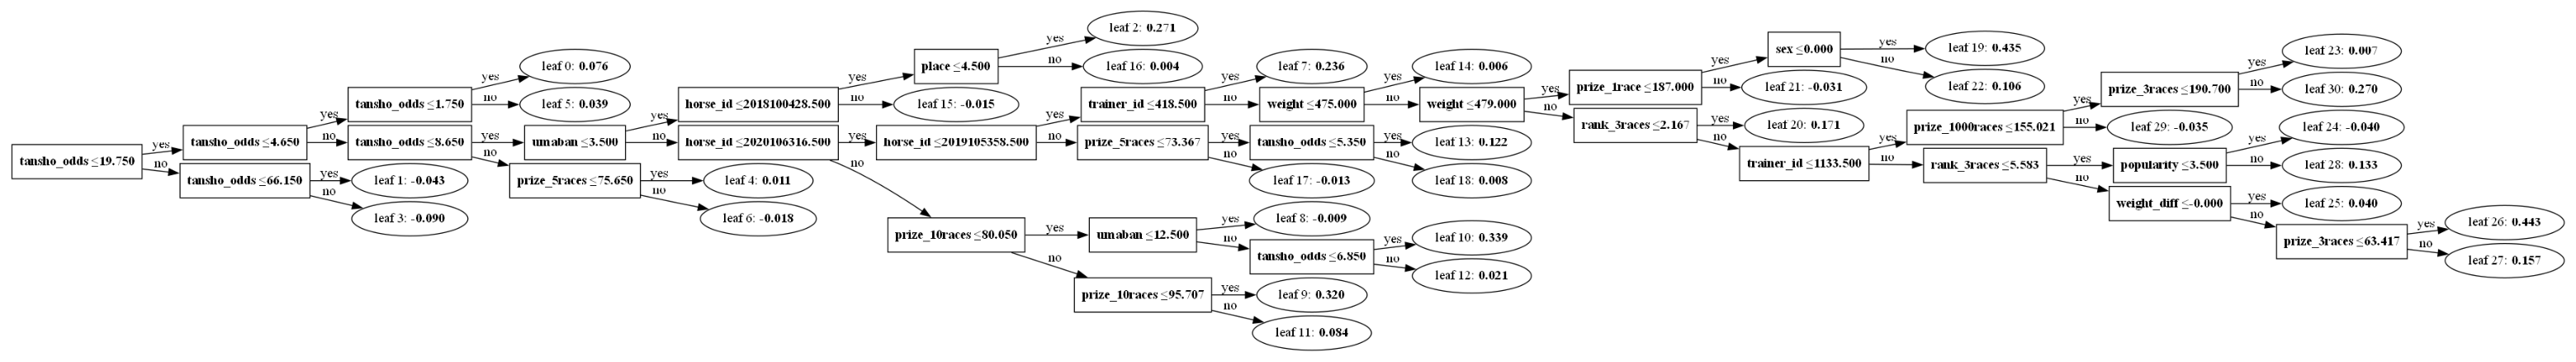

In [14]:
lgb.plot_tree(model,tree_index= 10, figsize= (40,20))
#lgb.plot_tree(model)

## 特徴量重要度
モデルにインプットしたデータの中で、どの特徴量（列）が一番学習に使われているか

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

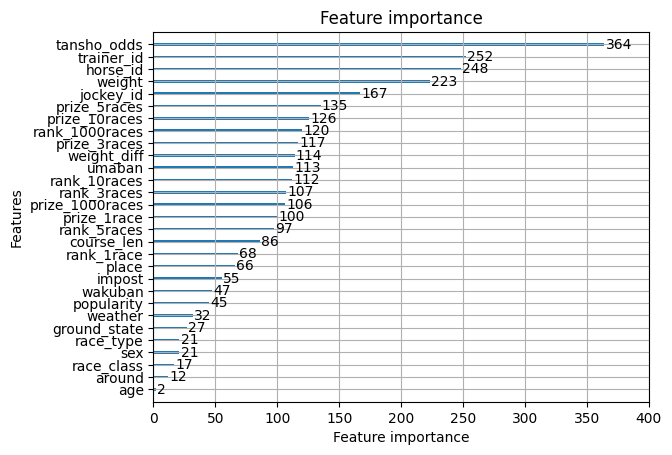

In [15]:
lgb.plot_importance(model)

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

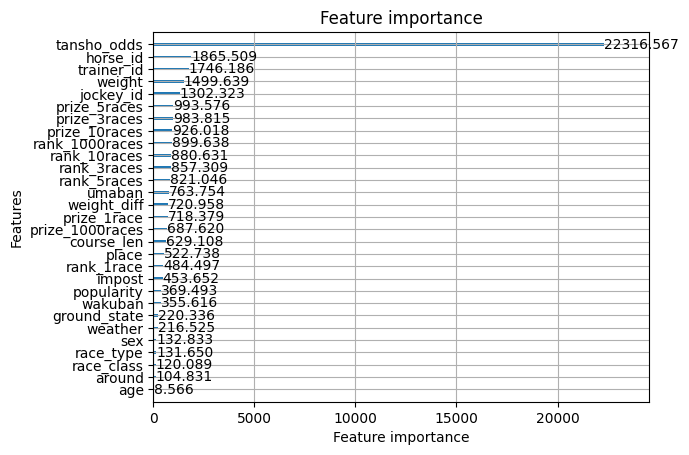

In [16]:
lgb.plot_importance(model,importance_type="gain")

# 予測時の処理
## レース前日準備

In [59]:
import preprocessing

horse_results_preprocessed = preprocessing.process_horse_results(
    save_filename="horse_results_prediction.csv"
)

In [58]:
horse_results_preprocessed[horse_results_preprocessed["rank_diff"].isnull()]

,horse_id,date,rank,prize,rank_diff,weather,race_type,course_len,ground_state,race_class,n_horses
3979,2018105192,2023-04-15,7,0.0,NaN,NaN,1,1400,2,NaN,11
4159,2020110136,2023-02-25,12,0.0,NaN,NaN,0,1600,0,NaN,13
